<a href="https://colab.research.google.com/github/lilitstepanyan0585gmailcom/ssd_project/blob/main/sdprojectt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python-headless


In [3]:
import cv2
import numpy as np
import random
from google.colab import drive

def extract_key_frames(video_path, threshold=0.75, skip_frames=10):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Ошибка при открытии видео файла.")
        return []

    prev_hist = None
    key_frames = []
    frame_count = 0

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            frame_count += 1
            if frame_count % skip_frames != 0:
                continue  # Пропуск кадров


            hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            hist = cv2.calcHist([hsv_frame], [0, 1, 2], None, [180, 256, 256], [0, 180, 0, 256, 0, 256])
            cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)

            if prev_hist is not None:
                score = cv2.compareHist(prev_hist, hist, cv2.HISTCMP_CHISQR)
                if score > threshold:
                    frame_index = int(cap.get(cv2.CAP_PROP_POS_FRAMES)) - 1
                    key_frames.append((frame, frame_index, score))
            prev_hist = hist
    finally:
        cap.release()

    return key_frames

def save_key_frames(key_frames, save_path):
    if not key_frames:
        print("Ключевые кадры не найдены.")
        return\

    # Сорт по убыванию score
    key_frames.sort(key=lambda x: x[2], reverse=True)


    selected_frames = key_frames[:3]

    for idx, (frame, frame_idx, _) in enumerate(selected_frames):
        frame_path = f"{save_path}key_frame_{frame_idx}.png"
        cv2.imwrite(frame_path, frame)
        print(f"Лучший кадр {idx + 1} сохранен по пути: {frame_path}, индекс кадра: {frame_idx}")


video_path = '/content/drive/MyDrive/Лилит /39.mp4' #путь к файлику
save_path = '/content/drive/MyDrive/KeyFrames/'

key_frames = extract_key_frames(video_path)
save_key_frames(key_frames, save_path)


Лучший кадр 1 сохранен по пути: /content/drive/MyDrive/KeyFrames/key_frame_20939.png, индекс кадра: 20939
Лучший кадр 2 сохранен по пути: /content/drive/MyDrive/KeyFrames/key_frame_15589.png, индекс кадра: 15589
Лучший кадр 3 сохранен по пути: /content/drive/MyDrive/KeyFrames/key_frame_23099.png, индекс кадра: 23099


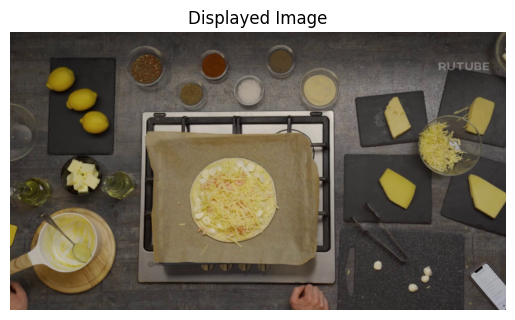

In [28]:
import cv2
import matplotlib.pyplot as plt

def display_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Не удалось загрузить изображение. Проверьте путь к файлу.")
        return


    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    plt.imshow(image_rgb)
    plt.title('Displayed Image')
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/KeyFrames/key_frame_20939.png' #путь к файлику
display_image(image_path)


In [13]:
from transformers import pipeline

def translate_text(text, model_id="Helsinki-NLP/opus-mt-ru-en"):
    translator = pipeline("translation_ru_to_en", model=model_id)

    translation = translator(text, max_length=512)
    translated_text = translation[0]['translation_text']

    return translated_text

# Пример использования функции
russian_text = "рисунок в стиле аниме"
translated_text = translate_text(russian_text)
print("Переведенный текст:", translated_text)


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Переведенный текст: Anime-style drawing


In [14]:
!pip install accelerate

In [15]:
!pip install jax
!pip install jaxlib
!pip install optax
!pip install chex

In [16]:
from huggingface_hub import notebook_login

notebook_login()

In [17]:
!pip install diffusers

In [26]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)

init_image = Image.open(open("/content/drive/MyDrive/KeyFrames/key_frame_20939.png", "rb")).convert("RGB")#вставить ключ кадр
init_image = init_image.resize((768, 512))

prompt = "youtube video thumbnail: " + translated_text

images = pipe(prompt=prompt, image=init_image, strength=0.5, guidance_scale=7.5).images
images[0].save("aboba.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

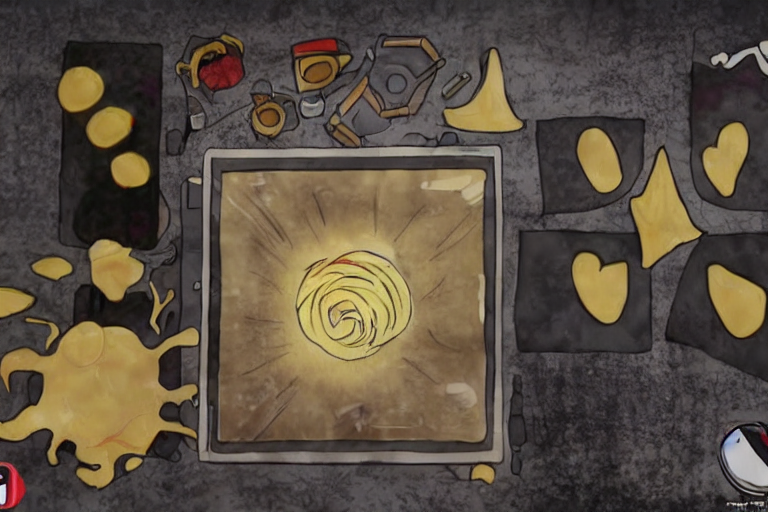

In [27]:
images[0]